In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [4]:
csv_dir = '../runtimes/'
parallel_path = 'parallel_minimax.csv'
sequential_path = 'sequential_minimax.csv'

In [34]:
parallel_df = pd.read_csv(csv_dir + parallel_path)
h_1_parallel_df = parallel_df.iloc[0:5]
h_1_parallel_df.set_index('depth', inplace=True)
h_1_parallel_df = h_1_parallel_df.sort_index()

h_2_parallel_df = parallel_df.iloc[5:]
h_2_parallel_df.set_index('depth', inplace=True)
h_2_parallel_df = h_2_parallel_df.sort_index()
print(h_1_parallel_df.head(), '\n', h_2_parallel_df.head())

           mode  duration
depth                    
1      parallel  0.448160
2      parallel  0.433837
3      parallel  0.471526
4      parallel  0.769578
5      parallel  8.152535 
            mode  duration
depth                    
1      parallel  0.450003
1      parallel  0.423836
1      parallel  0.435368
1      parallel  0.471520
1      parallel  0.424393


In [33]:
sequential_df = pd.read_csv(csv_dir + sequential_path)
h_1_sequential_df = sequential_df.iloc[0:5]
h_1_sequential_df.set_index('depth', inplace=True)
h_1_sequential_df = h_1_sequential_df.sort_index()

h_2_sequential_df = sequential_df.iloc[5:]
h_2_sequential_df.set_index('depth', inplace=True)
h_2_sequential_df = h_2_sequential_df.sort_index()
print(h_1_sequential_df.head(), '\n', h_2_sequential_df.head())

             mode   duration
depth                       
1      sequential   0.418231
2      sequential   0.431483
3      sequential   0.485157
4      sequential   2.055233
5      sequential  39.041959 
              mode  duration
depth                      
1      sequential  0.476004
1      sequential  0.442754
1      sequential  0.481498
1      sequential  0.470433
1      sequential  0.432979


C:\Users\chaud\AppData\Local\Temp\ipykernel_33584\2970044245.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 10 ** 2)


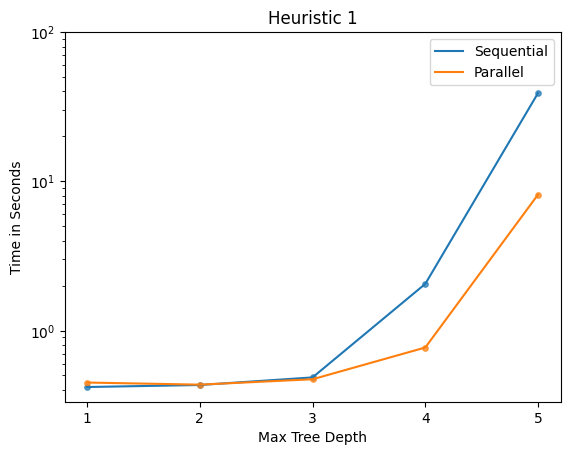

In [59]:
plt.plot(h_1_sequential_df.index, h_1_sequential_df['duration'], label = 'Sequential')
plt.plot(h_1_parallel_df.index, h_1_parallel_df['duration'], label = 'Parallel')
plt.scatter(h_1_sequential_df.index, h_1_sequential_df['duration'], s=15, alpha=0.7)
plt.scatter(h_1_parallel_df.index, h_1_parallel_df['duration'], s=15, alpha=0.7)

plt.yscale('log')
plt.ylim(0, 10 ** 2)

plt.xlabel('Max Tree Depth')
plt.ylabel('Time in Seconds')
plt.title('Heuristic 1')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.legend()

[ 0.4607336  0.4566126  0.621039   4.202828  91.2608806]
[ 0.441024   0.4506194  0.494326   1.2116008 18.100074 ]


C:\Users\chaud\AppData\Local\Temp\ipykernel_33584\3222086418.py:17: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 10 ** 2)


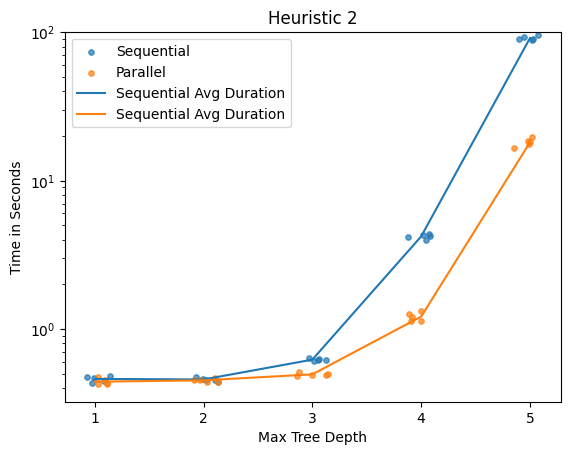

In [55]:
x1_offsets = np.random.uniform(low=-0.15, high=0.15, size=len(h_2_parallel_df.index))
x2_offsets = np.random.uniform(low=-0.15, high=0.15, size=len(h_2_parallel_df.index))

plt.scatter(h_2_sequential_df.index + x1_offsets, h_2_sequential_df['duration'], label = 'Sequential', s=15, alpha=0.7)
plt.scatter(h_2_parallel_df.index + x2_offsets, h_2_parallel_df['duration'], label = 'Parallel', s=15, alpha=0.7)


h2_sequential_avg_duration = h_2_sequential_df.groupby('depth')['duration'].mean().values
h2_parallel_avg_duration = h_2_parallel_df.groupby('depth')['duration'].mean().values
print(h2_sequential_avg_duration)
print(h2_parallel_avg_duration)

plt.plot(h_2_sequential_df.index.unique(), h2_sequential_avg_duration, label = 'Sequential Avg Duration')
plt.plot(h_2_parallel_df.index.unique(), h2_parallel_avg_duration, label = 'Sequential Avg Duration')

plt.yscale('log')
plt.ylim(0, 10 ** 2)

plt.xlabel('Max Tree Depth')
plt.ylabel('Time in Seconds')
plt.title('Heuristic 2')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.legend()